In [3]:
pip install transformers pillow


In [4]:
pip install torch torchvision


Files already downloaded and verified


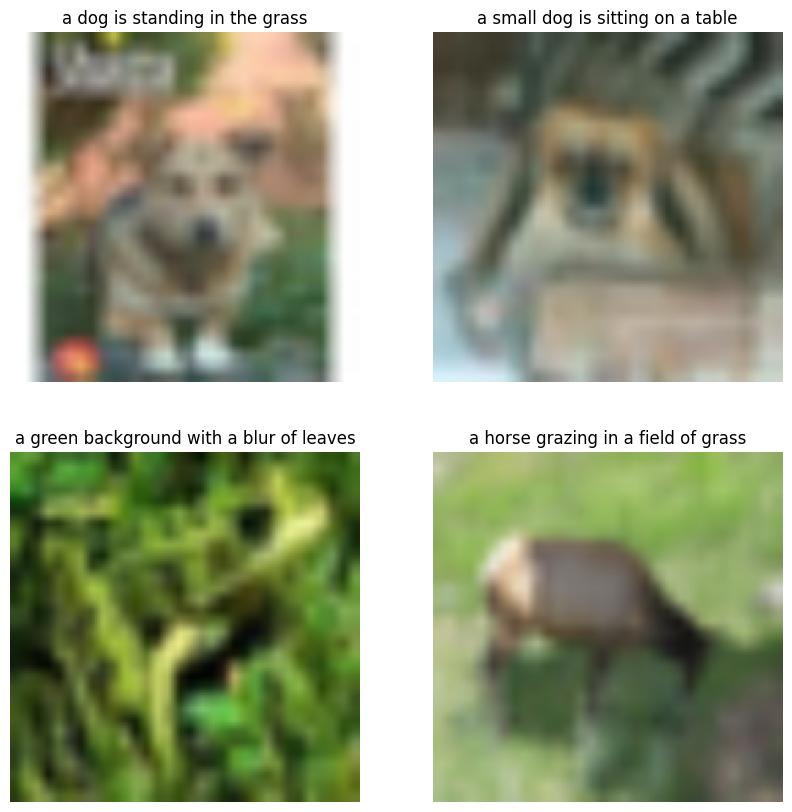

In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize for BLIP model compatibility
    transforms.ToTensor(),
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(
    root="data",
    train=False,  # Using the test dataset as an example
    download=True,
    transform=transform
)

# DataLoader to get images in batches
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Load BLIP model and processor for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for a single image
def generate_caption(image_tensor):
    # Convert image tensor to PIL image and process it
    image = transforms.ToPILImage()(image_tensor)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

# Display images with captions
batch = next(iter(data_loader))
images, labels = batch

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    image = images[i]
    caption = generate_caption(image)

    # Plotting the image and caption
    plt.subplot(2, 2, i + 1)
    plt.imshow(transforms.ToPILImage()(image))
    plt.title(caption)
    plt.axis('off')

plt.show()


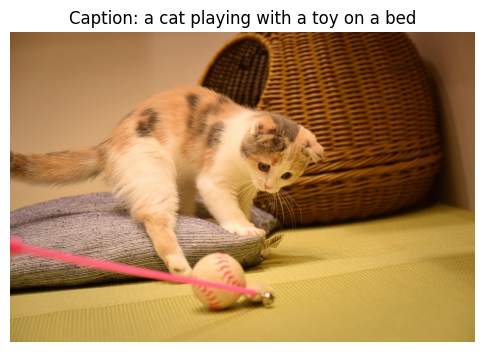

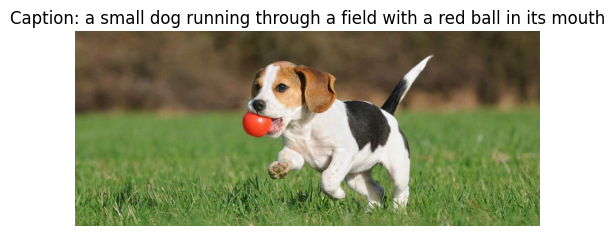

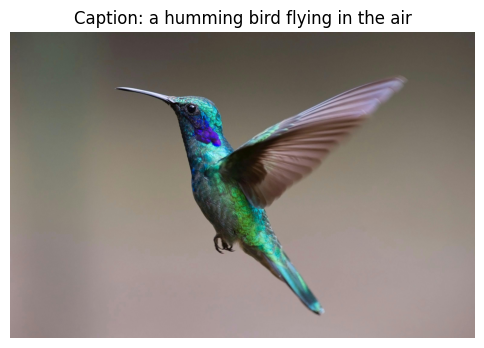

In [17]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load a pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Path to the directory containing images (replace with your folder path)
image_folder ="/content/drive/MyDrive/img captioning dataset"  # Replace with the path to your image folder

# Get the list of all image files in the directory
image_extensions = ['.jpg', '.jpeg', '.png','.jpg','.png']  # List of accepted image file extensions
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.splitext(f)[1].lower() in image_extensions]

# Loop through each image in the folder
for image_path in image_paths:
    # Load the image
    image = Image.open(image_path)

    # Prepare the image for the model and generate a caption
    inputs = processor(images=image, return_tensors="pt")
    outputs = model.generate(**inputs)

    # Decode the generated caption
    caption = processor.decode(outputs[0], skip_special_tokens=True)

    # Plotting the image with its caption
    plt.figure(figsize=(6, 6))  # Set figure size
    plt.imshow(image)  # Display the image
    plt.title(f"Caption: {caption}")  # Add the caption as the title
    plt.axis('off')  # Turn off the axis
    plt.show()  # Show the plot
